In [1]:
# Standard stuff
import numpy as np
from matplotlib import pyplot as plt

from utils.plot_utils import newplot, COLUMN_WIDTH_INCHES
from utils.stats_utils import correlation_improved_estimates

import os, sys
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# # ML stuff
from keras.layers import Dense, Dropout, Input, Concatenate, LeakyReLU
import tensorflow as tf
from GaussianAnsatz.utils import build_gaussianAnsatz_DNN, build_gaussianAnsatz_EFN, build_gaussianAnsatz_PFN, determine_constant
import energyflow as ef

2024-02-02 17:03:28.589481: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-02 17:03:28.622370: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 17:03:28.785947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 17:03:28.788190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 17:03:29.394135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
sigma_1 = 1.0
sigma_2 = 0.1

Lambdas = np.logspace(-2, 2, 1000)


# Gaussian

In [3]:
z1 = 2
z2 = -3
mode = "GAUSSIAN"




z1_primes, z2_primes, sigma1_primes, sigma2_primes = correlation_improved_estimates(z1, z2, sigma_1, sigma_2, Lambdas,
                                                                                    mode = mode)




(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)


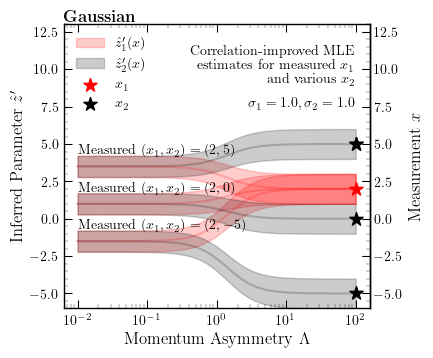

(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)


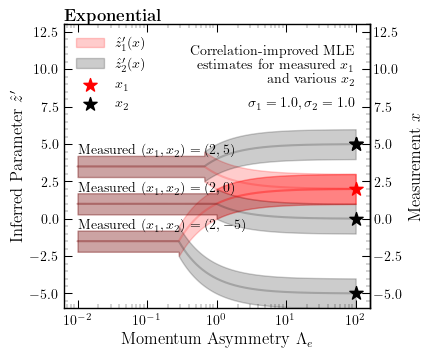

(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)


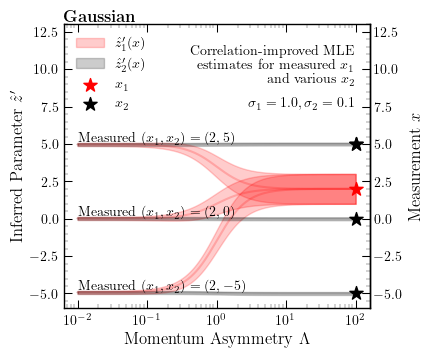

(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)
(1000,) (1000,) (1000,) (1000,) (1000,)


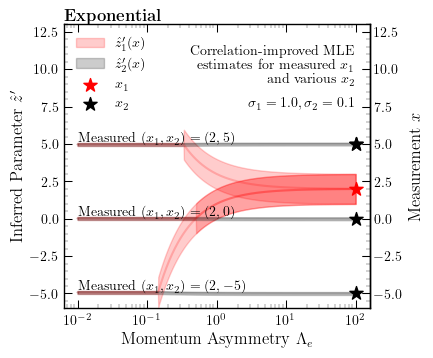

In [4]:
def plot(sigma_1, sigma_2, mode):

    fig, ax = newplot("column", height= COLUMN_WIDTH_INCHES*1.1, width= COLUMN_WIDTH_INCHES * 1.1 * 1.2 )
    mode_string = "Gaussian" if mode == "GAUSSIAN" else "Exponential"


    for (i, z2_) in enumerate([-5, 0, 5]):

        z1_temp = z1 * np.ones_like(Lambdas)
        z2_temp = z2_ * np.ones_like(Lambdas)
        sigma1_temp = sigma_1 * np.ones_like(Lambdas)
        sigma2_temp = sigma_2 * np.ones_like(Lambdas)
        z1_primes, z2_primes, sigma1_primes, sigma2_primes = correlation_improved_estimates(z1_temp, z2_temp, sigma1_temp, sigma2_temp, Lambdas,
                                                                                        mode = mode)

        
        print(z1_primes.shape, z2_primes.shape, sigma1_primes.shape, sigma2_primes.shape, Lambdas.shape)
        # print(z1_primes, Lambdas)

        plt.plot(Lambdas, z1_primes, alpha=0.2, color="red")
        plt.plot(Lambdas, z2_primes, alpha=0.2, color="black")

        if i == 0:
            plt.fill_between(Lambdas, z1_primes - sigma1_primes, z1_primes + sigma1_primes, color="red", alpha=0.2, label="$\hat{z}_1'(x)$")
            plt.fill_between(Lambdas, z2_primes - sigma2_primes, z2_primes + sigma2_primes, color="black", alpha=0.2, label="$\hat{z}_2'(x)$")
        else:
            plt.fill_between(Lambdas, z1_primes - sigma1_primes, z1_primes + sigma1_primes, color="red", alpha=0.2)
            plt.fill_between(Lambdas, z2_primes - sigma2_primes, z2_primes + sigma2_primes, color="black", alpha=0.2)
        plt.scatter(Lambdas[-1], z2_primes[-1], marker="*", s = 100, color="black")


        plt.text(1e-2, z1_primes[0] + sigma1_primes[0] + 0.08, rf"Measured $(x_1, x_2) = ({z1},{z2_})$", fontsize = 10)


    plt.scatter(Lambdas[-1], z1_primes[-1], marker="*", s = 100, color="red", label="$x_1$")
    plt.scatter(Lambdas[-1], z2_primes[-1], marker="*", s = 100, color="black", label="$x_2$")


    secay = ax.secondary_yaxis('right')
    secay.set_ylabel("Measurement $x$")

    plt.ylim(-6, 13)

    plt.xlabel(r"Momentum Asymmetry $\Lambda$")
    if mode == "EXPONENTIAL":
        plt.xlabel(r"Momentum Asymmetry $\Lambda_e$")

    plt.ylabel("Inferred Parameter $\hat{z}'$")
    plt.xscale("log")


    # Text
    plt.text(0.95, 0.925, "Correlation-improved MLE\nestimates for measured $x_1$\nand various $x_2$", transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right', fontsize = 10)
    plt.text(0.95, 0.7, "$\sigma_1 = %.1f, \sigma_2 = %.1f$" % (sigma_1, sigma_2), transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', fontsize = 10)
    plt.text(0, 1, r"\bf{%s}" % mode_string, weight = "bold", color = "black", transform = plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='left')



    plt.legend(frameon=False, loc="upper left", title = "")
    plt.savefig(f"Plots/toy_example_MLE_{int(sigma_2)}_{mode}.pdf")
    plt.show()


plot(1.0, 1.0, "GAUSSIAN")
plot(1.0, 1.0, "EXPONENTIAL")
plot(1.0, 0.1, "GAUSSIAN")
plot(1.0, 0.1, "EXPONENTIAL")